In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import pandas as pd



In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print("before--train data shape -->", X_train.shape)
print("before--test data shape-->", X_test.shape) 

before--train data shape --> (60000, 28, 28)
before--test data shape--> (10000, 28, 28)


In [3]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32")
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype("float32")
print("after--train data shape -->", X_train.shape)
print("after--test data shape-->", X_test.shape) 
print("第一張輸入資料：", X_train[0].shape)

after--train data shape --> (60000, 28, 28, 1)
after--test data shape--> (10000, 28, 28, 1)
第一張輸入資料： (28, 28, 1)


In [4]:
X_train = X_train / 255 
X_test = X_test / 255
#-- One-hot編碼
Y_train_bk = Y_train.copy() # 保留 one hot coding 前，原始載入的資料
Y_test_bk = Y_test.copy() # 保留 one hot coding 前，原始載入的資料
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
print("Y_train Shape: ", Y_train.shape) # 每個分類目標值以 10 個位置來表示
print("one-hot -->",Y_train[0]) # 10 個位置僅是 target 的地方是 1

Y_train Shape:  (60000, 10)
one-hot --> [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [5]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(5, 5), padding="same",
                 input_shape=(28, 28, 1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(5, 5), padding="same",
                 activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

model.summary()   # 顯示模型摘要資訊


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

In [6]:
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])

In [7]:
history = model.fit(X_train, Y_train, validation_split=0.2,
                    epochs=10, batch_size=128, verbose=2)

Epoch 1/10
375/375 - 21s - loss: 0.3877 - accuracy: 0.8776 - val_loss: 0.0792 - val_accuracy: 0.9753
Epoch 2/10
375/375 - 20s - loss: 0.1266 - accuracy: 0.9619 - val_loss: 0.0525 - val_accuracy: 0.9842
Epoch 3/10
375/375 - 20s - loss: 0.0953 - accuracy: 0.9705 - val_loss: 0.0450 - val_accuracy: 0.9861
Epoch 4/10
375/375 - 20s - loss: 0.0793 - accuracy: 0.9766 - val_loss: 0.0373 - val_accuracy: 0.9898
Epoch 5/10
375/375 - 20s - loss: 0.0711 - accuracy: 0.9779 - val_loss: 0.0352 - val_accuracy: 0.9907
Epoch 6/10
375/375 - 18s - loss: 0.0612 - accuracy: 0.9815 - val_loss: 0.0325 - val_accuracy: 0.9904
Epoch 7/10
375/375 - 18s - loss: 0.0610 - accuracy: 0.9819 - val_loss: 0.0328 - val_accuracy: 0.9902
Epoch 8/10
375/375 - 20s - loss: 0.0517 - accuracy: 0.9845 - val_loss: 0.0316 - val_accuracy: 0.9909
Epoch 9/10
375/375 - 19s - loss: 0.0491 - accuracy: 0.9845 - val_loss: 0.0320 - val_accuracy: 0.9902
Epoch 10/10
375/375 - 19s - loss: 0.0480 - accuracy: 0.9847 - val_loss: 0.0287 - val_accura

In [8]:
#---- Evaluation
loss, accuracy = model.evaluate(X_train, Y_train)
print("\n訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))

1875/1875 [==============================] - 8s 4ms/step - loss: 0.0179 - accuracy: 0.9945

訓練資料集的準確度 = 0.99
313/313 [==============================] - 1s 4ms/step - loss: 0.0230 - accuracy: 0.9920
測試資料集的準確度 = 0.99


In [9]:
#---- Prediction
#  Y_pred = model.predict_classes(X_test) # index of the label with maximum possibility in output layer
# np.argmax(model.predict(X_test), axis=-1)取代model.predict_classes(X_test)
Y_pred =np.argmax(model.predict(X_test), axis=-1)
ps = model.predict(X_test) # the content of nodes in output layer
ps = ps.round(1) # round to one digit after dot
tb = pd.crosstab(Y_test_bk.astype(int), Y_pred.astype(int),
                 rownames=["label"], colnames=["predict"])
tb.to_html("mnist_crosstab.html") # pd.crosstab 目標類別跟預測類別進行比對
print("\nClass of prediction: ", Y_pred)
print("Result of prediction:", ps)
print("Label of testing:", Y_test)


Class of prediction:  [7 2 1 ... 4 5 6]
Result of prediction: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Label of testing: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [10]:
#---- Save model
model.save("mnist_CNN.h5")

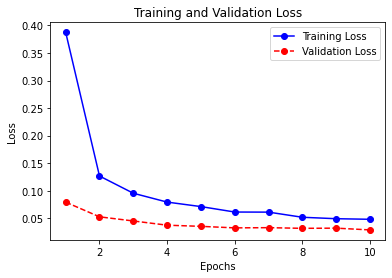

In [11]:
#---- 以圖表來分析模型的訓練過程
# 顯示訓練和驗證損失
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

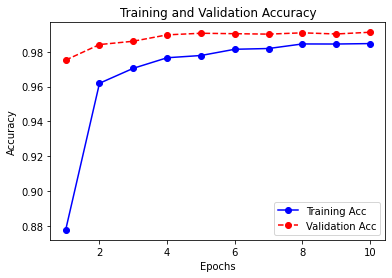

In [12]:
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()